In [ ]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

f = h5py.File("../results/simulation_results_full_low_noise.hdf5", "r")
x_min = -50
x_max = 50

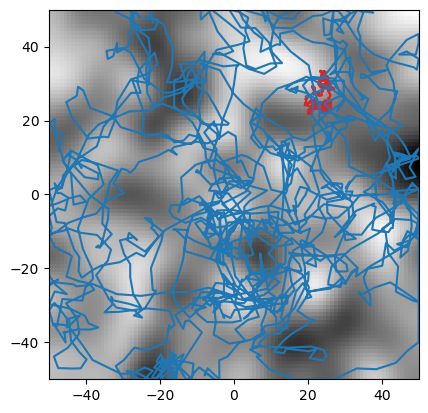

In [2]:
norm = mcolors.CenteredNorm()
sigma_val = 'sigma_sp_5'
environment_num = 'environment_1'
velocity_num1 = 'velocity_0.2'
velocity_num2 = 'velocity_5'
radius_num = 'radius_10'
simulation_num = 'simulation_4'
plt.imshow(f[sigma_val][environment_num]['mask'][()].T, norm=norm, cmap='gray', extent=[x_min, x_max, x_min, x_max], origin='lower', interpolation='none')
plt.plot(f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['trajectory'][()][:, 0], f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['trajectory'][()][:, 1], color='tab:red')
plt.plot(f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['trajectory'][()][:, 0], f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['trajectory'][()][:, 1], color='tab:blue')
# for the zero position plot the first two sensor vecs
start_pos = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['trajectory'][()][0, :]
# plt.plot([start_pos[0], start_pos[0]+sensor_vecs[0][0]], [start_pos[1], start_pos[1]+sensor_vecs[0][1]], color='tab:orange')
# plt.plot([start_pos[0], start_pos[0]+sensor_vecs[1][0]], [start_pos[1], start_pos[1]+sensor_vecs[1][1]], color='tab:orange')


In [3]:
sensor_vecs = [np.array([10 * np.cos(theta), 10 * np.sin(theta)]) for theta in np.linspace(0, 2 * np.pi, 8, endpoint=False)]

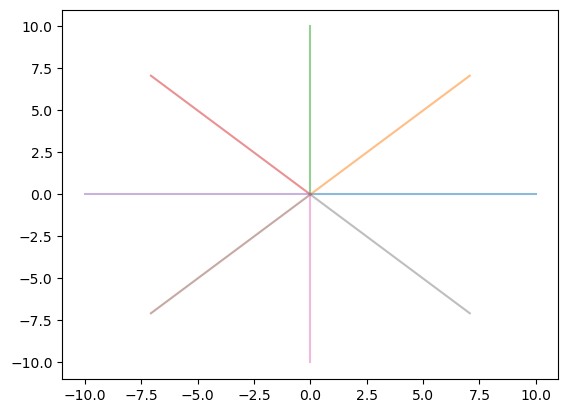

In [4]:
# plot each of the sensor vectors
for sensor_vec in sensor_vecs:
    plt.plot([0, sensor_vec[0]], [0, sensor_vec[1]], alpha=0.5)

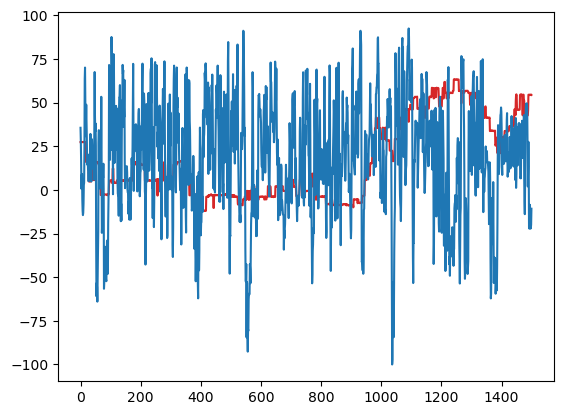

In [5]:
plt.plot(f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['stimulus_hist'][()], color='tab:red')
plt.plot(f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['stimulus_hist'][()], color='tab:blue')

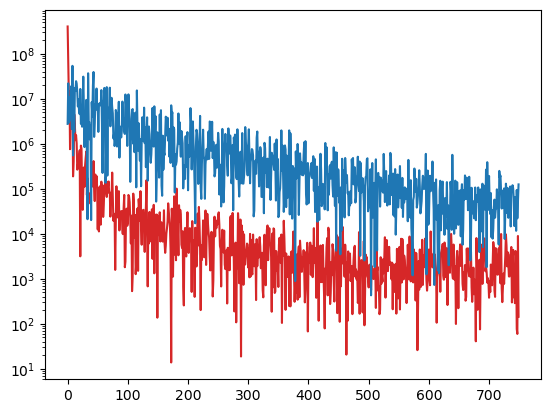

In [6]:
# take the fourier transform of the stimulus history
stimulus_hist_0 = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['stimulus_hist'][()]
stimulus_hist_1 = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['stimulus_hist'][()]
stimulus_hist_0 = np.fft.rfft(stimulus_hist_0)
stimulus_hist_1 = np.fft.rfft(stimulus_hist_1)
plt.plot(np.abs(stimulus_hist_0[1:])**2, color='tab:red')
plt.plot(np.abs(stimulus_hist_1[1:])**2, color='tab:blue')
plt.yscale('log')


In [7]:
np.linspace(0, 2 * np.pi, 8, endpoint=False)*360/(2*np.pi)

array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

In [8]:
f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['sensor_stimuli'][()].shape

(1500, 8)

Text(0.5, 1.0, 'Correlation coefficient: 0.20')

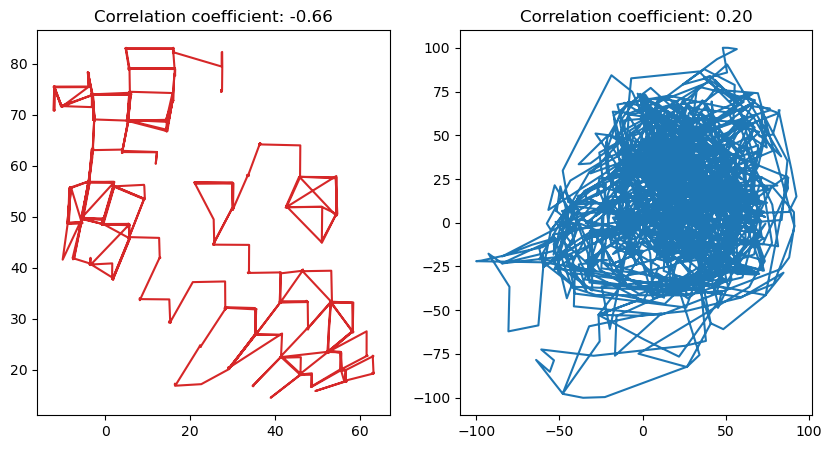

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sensor_idx = 2

ax[0].plot(f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['stimulus_hist'][()], f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['sensor_stimuli'][()][:, sensor_idx], color='tab:red')
ax[1].plot(f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['stimulus_hist'][()], f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['sensor_stimuli'][()][:, sensor_idx], color='tab:blue')

# compute the correlation coefficient between stimulus_hist and stimulus_hist2 for each velocity
stimulus_hist_0 = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['stimulus_hist'][()]
stimulus_hist_1 = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['stimulus_hist'][()]
stimulus_hist2_0 = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['sensor_stimuli'][()][:, sensor_idx]
stimulus_hist2_1 = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['sensor_stimuli'][()][:, sensor_idx]
corr_0 = np.corrcoef(stimulus_hist_0, stimulus_hist2_0)[0, 1]
corr_1 = np.corrcoef(stimulus_hist_1, stimulus_hist2_1)[0, 1]
ax[0].set_title(f'Correlation coefficient: {corr_0:.2f}')
ax[1].set_title(f'Correlation coefficient: {corr_1:.2f}')

In [10]:
f['sigma_sp_5']['environment_0']['velocity_0.2'].keys()

<KeysViewHDF5 ['radius_10', 'radius_2', 'radius_5']>

In [ ]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os

# Open the HDF5 file
f = h5py.File("results/simulation_results_full_low_noise_more_env_more_sim.hdf5", "r")

# Parameters for plotting
x_min = -50
x_max = 50
norm = mcolors.CenteredNorm()

# Folder to save the plots
output_folder = "figure1_sim_results_low_noise_more_env_more_sim"
os.makedirs(output_folder, exist_ok=True)

window_length = 5*30
simulation_length = 50*30
sensor1_idx = 1
sensor2_idx = 3
sensor_vecs = [np.array([np.cos(theta), np.sin(theta)]) for theta in np.linspace(0, 2 * np.pi, 8, endpoint=False)]

# Loop over sigma_sp, environments, and simulations
for sigma_val in f.keys():
    for environment_num in f[sigma_val].keys():
        for velocity_num1, velocity_num2 in [('velocity_0.2', 'velocity_5')]:
            for radius_num in f[sigma_val][environment_num][velocity_num1].keys():
                for simulation_num in f[sigma_val][environment_num][velocity_num1][radius_num].keys():
                    # select a random time in the simulation
                    start_idx = np.random.randint(0, simulation_length - window_length)
                    end_idx = start_idx + window_length
                    # Extract data
                    mask = f[sigma_val][environment_num]['mask'][()].T
                    trajectory1 = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['trajectory'][()][start_idx:end_idx, :]
                    trajectory2 = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['trajectory'][()][start_idx:end_idx, :]
                    stimulus_hist1 = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['stimulus_hist'][()][start_idx:end_idx]
                    stimulus_hist2 = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['stimulus_hist'][()][start_idx:end_idx]
                    sensor_stimuli1 = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['sensor_stimuli'][()][start_idx:end_idx, :]
                    sensor_stimuli2 = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['sensor_stimuli'][()][start_idx:end_idx, :]
                    sensor_stimuli1 -= sensor_stimuli1.mean(axis=0)
                    sensor_stimuli2 -= sensor_stimuli2.mean(axis=0)

                    # Compute correlation coefficients
                    corr_1 = np.corrcoef(sensor_stimuli1[:, sensor1_idx], sensor_stimuli1[:, sensor2_idx])[0, 1]
                    corr_2 = np.corrcoef(sensor_stimuli2[:, sensor1_idx], sensor_stimuli2[:, sensor2_idx])[0, 1]

                    # Create the figure
                    fig, axes = plt.subplots(1, 5, figsize=(13.5+8+6, 4.5), width_ratios=[4.5, 8, 6, 4.5, 4.5])
                    fig.suptitle(f"Sigma: {sigma_val}, Environment: {environment_num}, Velocity: {velocity_num1} vs {velocity_num2}, Radius: {radius_num}, Simulation: {simulation_num}", fontsize=16)

                    # First Column: Environment and trajectories
                    axes[0].imshow(mask, norm=norm, cmap='gray', extent=[x_min, x_max, x_min, x_max], origin='lower', interpolation='none')
                    axes[0].plot(trajectory2[:, 0], trajectory2[:, 1], color='tab:blue', label='Velocity 5')
                    axes[0].plot(trajectory1[:, 0], trajectory1[:, 1], color='tab:red', label='Velocity 0.2')
                    axes[0].set_title("Environment & Trajectories")
                    axes[0].legend()
                    # also plot the sensor vectors for the first trajectory starting point
                    start_pos = trajectory1[0, :]
                    # split the radius_num string into two parts divided by '_'
                    radius_num_parts = radius_num.split('_')
                    # convert the second part to an integer
                    radius_num_int = int(radius_num_parts[1])
                    axes[0].plot([start_pos[0], start_pos[0]+radius_num_int*sensor_vecs[sensor1_idx][0]], [start_pos[1], start_pos[1]+radius_num_int*sensor_vecs[sensor1_idx][1]], color='tab:purple')
                    axes[0].plot([start_pos[0], start_pos[0]+radius_num_int*sensor_vecs[sensor2_idx][0]], [start_pos[1], start_pos[1]+radius_num_int*sensor_vecs[sensor2_idx][1]], color='tab:orange')

                    # Second Column: Stimulus history
                    axes[1].plot(sensor_stimuli2[:, sensor2_idx], color='tab:blue', label='Velocity 5')
                    axes[1].plot(sensor_stimuli1[:, sensor2_idx], color='tab:red', label='Velocity 0.2')
                    axes[1].set_title("Stimulus History")
                    axes[1].legend()

                    # Third Column: Fourier Transform of Stimulus History
                    stimulus_hist_0 = np.fft.rfft(sensor_stimuli1[:, sensor2_idx])
                    stimulus_hist_1 = np.fft.rfft(sensor_stimuli2[:, sensor2_idx])
                    axes[2].plot(np.abs(stimulus_hist_0[1:])**2, color='tab:red', label='Velocity 0.2')
                    axes[2].plot(np.abs(stimulus_hist_1[1:])**2, color='tab:blue', label='Velocity 5')
                    axes[2].set_yscale('log')
                    axes[2].set_title("Fourier Transform of Stimulus History")
                    axes[2].legend()

                    # Fourth Column: Stimulus history vs. sensor stimuli (Velocity 0.2)
                    axes[3].plot(sensor_stimuli1[:, sensor2_idx], sensor_stimuli1[:, sensor1_idx], color='tab:red')
                    axes[3].set_title(f"Stimulus vs. Sensor (Vel 0.2)\nSensor indices: {sensor1_idx, sensor2_idx}, Corr: {corr_1:.2f}")

                    # Fifth Column: Stimulus history vs. sensor stimuli (Velocity 5)
                    axes[4].plot(sensor_stimuli2[:, sensor2_idx], sensor_stimuli2[:, sensor1_idx], color='tab:blue')
                    axes[4].set_title(f"Stimulus vs. Sensor (Vel 5)\nSensor indices: {sensor1_idx, sensor2_idx}, Corr: {corr_2:.2f}")

                    # Adjust layout
                    plt.tight_layout()

                    # Save the plot
                    output_file = os.path.join(output_folder, f"{sigma_val}_{environment_num}_{radius_num}_{simulation_num}.pdf")
                    plt.savefig(output_file)
                    plt.close(fig)

print(f"Plots saved in folder: {output_folder}")

In [3]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os

# Open the HDF5 file
f = h5py.File("results/simulation_results_full_low_noise_more_env_more_sim.hdf5", "r")

# Parameters for plotting
x_min = -50
x_max = 50
norm = mcolors.CenteredNorm()

window_length = 5*30
simulation_length = 50*30
num_chunks = 1000
sensor1_idx = 1
sensor2_idx = 3
sensor_vecs = [np.array([np.cos(theta), np.sin(theta)]) for theta in np.linspace(0, 2 * np.pi, 8, endpoint=False)]

num_sigma = len(f.keys())
num_environments = len(f['sigma_sp_5'].keys())
num_velocities = len(f['sigma_sp_5']['environment_0'].keys())
num_radii = len(f['sigma_sp_5']['environment_0']['velocity_0.2'].keys())
num_simulations = len(f['sigma_sp_5']['environment_0']['velocity_0.2']['radius_10'].keys())

all_correlation_mov = np.zeros((num_sigma, num_environments, num_radii, num_simulations, num_chunks))
all_correlation_stat = np.zeros((num_sigma, num_environments, num_radii, num_simulations, num_chunks))
# compute the correlation coefficient for overlapping windows of 5 seconds
velocity_num1 = 'velocity_0.2'
velocity_num2 = 'velocity_5'
for i, sigma_val in enumerate(f.keys()):
    for j, environment_num in enumerate(f[sigma_val].keys()):
        for l, radius_num in enumerate(f[sigma_val][environment_num][velocity_num1].keys()):
            for m, simulation_num in enumerate(f[sigma_val][environment_num][velocity_num1][radius_num].keys()):
                sensor_stimuli1 = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['sensor_stimuli'][()]
                sensor_stimuli2 = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['sensor_stimuli'][()]
                # chunk the data
                corr_1 = np.zeros(num_chunks)
                corr_2 = np.zeros(num_chunks)
                for n in range(num_chunks):
                    start_idx = np.random.randint(0, simulation_length - window_length)
                    end_idx = start_idx + window_length
                    corr_1[n] = np.corrcoef(sensor_stimuli1[start_idx:end_idx, sensor1_idx], sensor_stimuli1[start_idx:end_idx, sensor2_idx])[0, 1]
                    corr_2[n] = np.corrcoef(sensor_stimuli2[start_idx:end_idx, sensor1_idx], sensor_stimuli2[start_idx:end_idx, sensor2_idx])[0, 1]
                all_correlation_stat[i, j, l, m, :] = corr_1
                all_correlation_mov[i, j, l, m, :] = corr_2
                


In [25]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os

# Open the HDF5 file
f = h5py.File("results/simulation_results_full_low_noise_more_env_more_sim.hdf5", "r")

x_min = -50
x_max = 50
norm = mcolors.CenteredNorm()

window_length = 5*30
simulation_length = 50*30
num_chunks = 1000
num_sensors = 8  # Update if needed

num_sigma = len(f.keys())
num_environments = len(f['sigma_sp_5'].keys())
num_radii = len(f['sigma_sp_5']['environment_0']['velocity_0.2'].keys())
num_simulations = len(f['sigma_sp_5']['environment_0']['velocity_0.2']['radius_10'].keys())

num_pairs = num_sensors * (num_sensors - 1) // 2
all_correlation_mov = np.zeros((num_sigma, num_environments, num_radii, num_simulations, num_pairs, num_chunks))
all_correlation_stat = np.zeros((num_sigma, num_environments, num_radii, num_simulations, num_pairs, num_chunks))

velocity_num1 = 'velocity_0.2'
velocity_num2 = 'velocity_5'
sensor_pairs = [(i, j) for i in range(num_sensors) for j in range(i+1, num_sensors)]

for i, sigma_val in enumerate(f.keys()):
    for j, environment_num in enumerate(f[sigma_val].keys()):
        for l, radius_num in enumerate(f[sigma_val][environment_num][velocity_num1].keys()):
            for m, simulation_num in enumerate(f[sigma_val][environment_num][velocity_num1][radius_num].keys()):
                sensor_stimuli1 = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['sensor_stimuli'][()]
                sensor_stimuli2 = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['sensor_stimuli'][()]
                # Precompute all random windows at once for this simulation
                start_indices = np.random.randint(0, simulation_length - window_length, size=num_chunks)
                end_indices = start_indices + window_length
                # Preallocate for all pairs at once
                corr_1 = np.zeros((num_pairs, num_chunks))
                corr_2 = np.zeros((num_pairs, num_chunks))
                for n in range(num_chunks):
                    s_idx = start_indices[n]
                    e_idx = end_indices[n]
                    # Extract windowed data once
                    win1 = sensor_stimuli1[s_idx:e_idx, :]
                    win2 = sensor_stimuli2[s_idx:e_idx, :]
                    # Compute full correlation matrices for the window
                    corrmat1 = np.corrcoef(win1, rowvar=False)
                    corrmat2 = np.corrcoef(win2, rowvar=False)
                    # Extract upper triangle (excluding diagonal) as a flat array
                    corr_1[:, n] = corrmat1[np.triu_indices(num_sensors, k=1)]
                    corr_2[:, n] = corrmat2[np.triu_indices(num_sensors, k=1)]
                all_correlation_stat[i, j, l, m, :, :] = corr_1
                all_correlation_mov[i, j, l, m, :, :] = corr_2

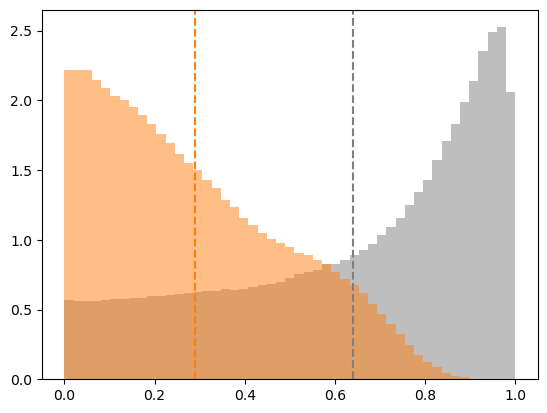

In [34]:
bins = np.linspace(0, 1, 50)

sigma_idx = 1
radius_idx = 0

plt.hist(np.abs(all_correlation_stat[sigma_idx, :, radius_idx, :, :, :].flatten()), bins=bins, alpha=0.5, label='Static', color='tab:gray', density=True)
plt.hist(np.abs(all_correlation_mov[sigma_idx, :, radius_idx, :, :, :].flatten()), bins=bins, alpha=0.5, label='Moving', color='tab:orange', density=True)
# plot vertical line at mean
plt.axvline(np.abs(all_correlation_stat[sigma_idx, :, radius_idx, :, :, :].flatten()).mean(), color='tab:gray', linestyle='--', label='Mean Static')
plt.axvline(np.abs(all_correlation_mov[sigma_idx, :, radius_idx, :, :, :].flatten()).mean(), color='tab:orange', linestyle='--', label='Mean Moving')
plt.savefig('manuscript_figures/fig4_sim_correlation_histogram.pdf', bbox_inches='tight', format='pdf')

# Distribution of SD

In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import bottleneck as bn

# Open the HDF5 file
f = h5py.File("results/simulation_results_full_low_noise_more_env_more_sim.hdf5", "r")

# Parameters for plotting
x_min = -50
x_max = 50
norm = mcolors.CenteredNorm()

window_length = 5*30
simulation_length = 50*30

num_sigma = len(f.keys())
num_environments = len(f['sigma_sp_5'].keys())
num_velocities = len(f['sigma_sp_5']['environment_0'].keys())
num_radii = len(f['sigma_sp_5']['environment_0']['velocity_0.2'].keys())
num_simulations = len(f['sigma_sp_5']['environment_0']['velocity_0.2']['radius_10'].keys())
num_sensors = 8

all_SD_mov = np.zeros((2, num_environments, num_simulations, simulation_length, num_sensors))
all_SD_stat = np.zeros((2, num_environments, num_simulations, simulation_length, num_sensors))
# compute the correlation coefficient for overlapping windows of 5 seconds
velocity_num1 = 'velocity_0.2'
velocity_num2 = 'velocity_5'
sigma_val = 'sigma_sp_5'
radius_num = 'radius_10'
for k, sigma_val in enumerate(f.keys()):
    for i, environment_num in enumerate(f[sigma_val].keys()):
        for j, simulation_num in enumerate(f[sigma_val][environment_num][velocity_num1][radius_num].keys()):
            sensor_stimuli_stat = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['sensor_stimuli'][()]
            sensor_stimuli_mov = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['sensor_stimuli'][()]
            # compute the windowed SD
            all_SD_mov[k, i, j, :, :] = bn.move_std(sensor_stimuli_mov, window_length, min_count=1, axis=-2)
            all_SD_stat[k, i, j, :, :] = bn.move_std(sensor_stimuli_stat, window_length, min_count=1, axis=-2)
                


In [2]:
f.keys()

<KeysViewHDF5 ['sigma_sp_1', 'sigma_sp_5', 'simulation_params']>

In [3]:
# switch the third and fourth dimensions of all_SD_mov and all_SD_stat
all_SD_mov = np.moveaxis(all_SD_mov, 3, 4)
all_SD_stat = np.moveaxis(all_SD_stat, 3, 4)

In [4]:
all_SD_stat.shape

(2, 10, 10, 8, 1500)

In [5]:
mean_SD_mov = all_SD_mov.mean(axis=(1, 2, 4))
mean_SD_stat = all_SD_stat.mean(axis=(1, 2, 4))
ratio_SD = mean_SD_mov / mean_SD_stat
avg_ratio_SD = ratio_SD.mean(axis=1)
std_ratio_SD = ratio_SD.std(axis=1)

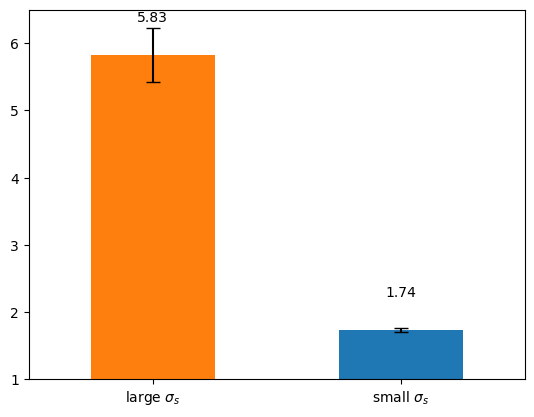

In [6]:
p = plt.bar([2, 1], avg_ratio_SD.tolist(), color=['tab:blue', 'tab:orange'], width=0.5, yerr=std_ratio_SD, capsize=5)
plt.xticks([1, 2], ['large $\\sigma_s$', 'small $\\sigma_s$'])
plt.ylim(1, 6.5)
plt.xlim(0.5, 2.5)
# add label above each bar with the ratio value
for i, bar in enumerate(p):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.45, f'{avg_ratio_SD[i]:.2f}', ha='center', va='bottom')
plt.savefig('manuscript_figures/fig5_sim_SD_ratio.pdf', bbox_inches='tight', format='pdf')

In [15]:
all_SD_mov.shape

(2, 10, 10, 8, 1500)

Mean SD (Moving): 27.986066299150924
Mean SD (Static): 10.261145053718536


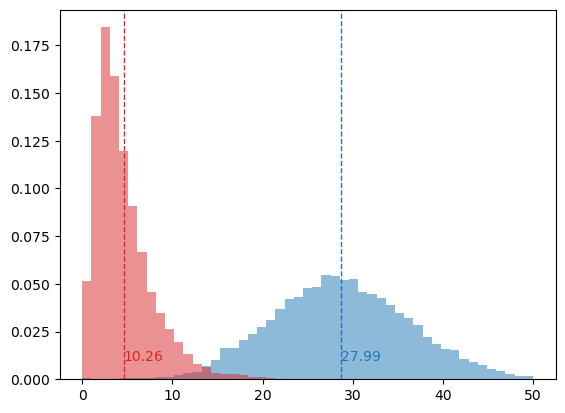

In [17]:
bins = np.linspace(0, 50, 50)

sensor_idx = 1

plt.hist(all_SD_mov[1, :, :, sensor_idx, :].flatten(), bins=bins, alpha=0.5, density=True, label='Moving', color='tab:blue')
plt.hist(all_SD_stat[1, :, :, sensor_idx, :].flatten(), bins=bins, alpha=0.5, density=True, label='Static', color='tab:red')
# plot the mean as a vertical line
plt.axvline(np.nanmean(all_SD_mov[1, :, :, sensor_idx, :].flatten()), color='tab:blue', linestyle='dashed', linewidth=1)
plt.axvline(np.nanmean(all_SD_stat[1, :, :, sensor_idx, :].flatten()), color='tab:red', linestyle='dashed', linewidth=1)
# print the numerical values of the means on the plot
plt.text(np.nanmean(all_SD_mov[1, :, :, sensor_idx, :].flatten()), 0.01, f"{np.nanmean(all_SD_mov[:, :, sensor_idx, :].flatten()):.2f}", color='tab:blue')
plt.text(np.nanmean(all_SD_stat[1, :, :, sensor_idx, :].flatten()), 0.01, f"{np.nanmean(all_SD_stat[:, :, sensor_idx, :].flatten()):.2f}", color='tab:red')
print(f"Mean SD (Moving): {np.nanmean(all_SD_mov[:, :, sensor_idx, :].flatten())}")
print(f"Mean SD (Static): {np.nanmean(all_SD_stat[:, :, sensor_idx, :].flatten())}")
# save in manuscript figure as pdf
plt.savefig("manuscript_figures/figure2_sim_results_low_noise_SD.pdf", bbox_inches='tight', format='pdf')

# Fourier spectra

In [1]:
from scipy.signal import welch

def compute_psd_welch(x, fs, window_size, overlap):
    """
    Compute one-sided PSD using Welch's method for a real-valued signal with variable window size and full overlap.

    Parameters:
    - x: 1D real-valued input signal
    - fs: sampling frequency (Hz)
    - window_size: length of each segment (samples)

    Returns:
    - freqs: frequency bins (Hz)
    - psd: power spectral density (power/Hz)
    """
    freqs, psd = welch(
        x,
        fs=fs,
        window='boxcar',
        nperseg=window_size,
        noverlap=overlap,  # full overlap
        return_onesided=True,
        scaling='density',
        detrend='constant'
    )
    return freqs, psd

In [ ]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import bottleneck as bn

# Open the HDF5 file
f = h5py.File("results/simulation_results_full_low_noise_more_env_more_sim.hdf5", "r")

# Parameters for plotting
x_min = -50
x_max = 50
norm = mcolors.CenteredNorm()

window_length = 5*30
simulation_length = 50*30

num_sigma = len(f.keys())
num_environments = len(f['sigma_sp_5'].keys())
num_velocities = len(f['sigma_sp_5']['environment_0'].keys())
num_radii = len(f['sigma_sp_5']['environment_0']['velocity_0.2'].keys())
num_simulations = len(f['sigma_sp_5']['environment_0']['velocity_0.2']['radius_10'].keys())
num_sensors = 8

all_spectra_mov = np.zeros((num_environments, num_simulations, window_length//2+1, num_sensors))
all_spectra_stat = np.zeros((num_environments, num_simulations, window_length//2+1, num_sensors))
# compute the correlation coefficient for overlapping windows of 5 seconds
velocity_num1 = 'velocity_0.2'
velocity_num2 = 'velocity_5'
sigma_val = 'sigma_sp_5'
radius_num = 'radius_10'
for i, environment_num in enumerate(f[sigma_val].keys()):
    for j, simulation_num in enumerate(f[sigma_val][environment_num][velocity_num1][radius_num].keys()):
        sensor_stimuli_stat = f[sigma_val][environment_num][velocity_num1][radius_num][simulation_num]['sensor_stimuli'][()]
        sensor_stimuli_mov = f[sigma_val][environment_num][velocity_num2][radius_num][simulation_num]['sensor_stimuli'][()]
        for k in range(num_sensors):
            _, all_spectra_mov[i, j, :, k] = compute_psd_welch(sensor_stimuli_mov[:, k], 1, window_length, window_length//2)
            freq, all_spectra_stat[i, j, :, k] = compute_psd_welch(sensor_stimuli_stat[:, k], 1, window_length, window_length//2)
                


In [3]:
all_spectra_mov.shape

(10, 10, 76, 8)

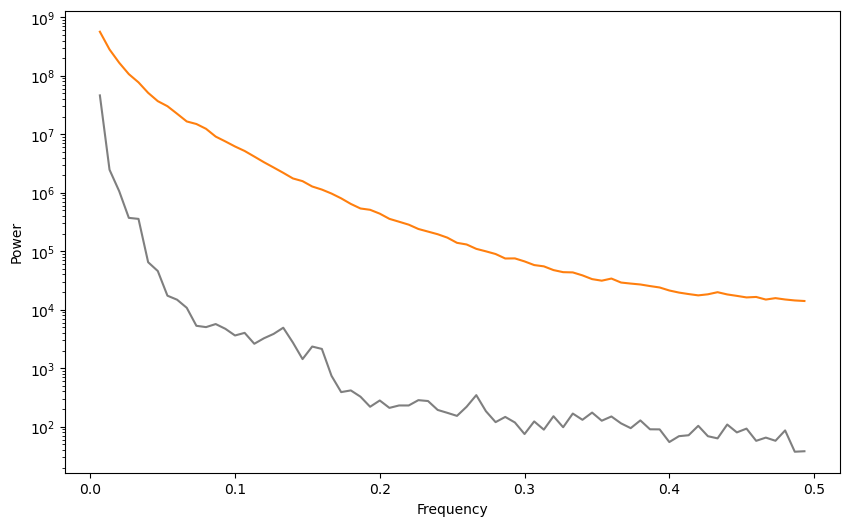

In [5]:
avg_spectra_mov = np.mean(np.abs(all_spectra_mov)**2, axis=(0, 1, 3))
avg_spectra_stat = np.mean(np.abs(all_spectra_stat)**2, axis=(0, 1, 3))
# plot the average spectra for each sensor
plt.figure(figsize=(10, 6))
plt.plot(freq[1:-1], avg_spectra_mov[1:-1], color='tab:orange', label='Moving')
plt.plot(freq[1:-1], avg_spectra_stat[1:-1], color='tab:gray', label='Static')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.yscale('log')
plt.savefig("manuscript_figures/fig3_sim_results_low_noise_spectra_welch.pdf", bbox_inches='tight', format='pdf')

# More sigma and velocities

In [1]:
import h5py

# load the file simulation_results_full_low_noise_more_env_more_sim_more_v_more_sigma.h5
f = h5py.File("results/simulation_results_full_low_noise_more_env_more_sim_more_v_more_sigma_redo.hdf5", "r")

f.keys()

<KeysViewHDF5 ['sigma_sp_0.1', 'sigma_sp_0.2', 'sigma_sp_0.5', 'sigma_sp_1', 'sigma_sp_2', 'sigma_sp_5', 'simulation_params']>

In [2]:
f['sigma_sp_5']['environment_0']['velocity_0.2'].keys()

<KeysViewHDF5 ['radius_10']>

In [3]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import bottleneck as bn

# Open the HDF5 file
# simulation_results_full_low_noise_more_env_more_sim_more_v_more_sigma
# simulation_results_full_low_noise_more_env_more_sim_more_v_more_sigma_redo
f = h5py.File("results/simulation_results_full_low_noise_more_env_more_sim_more_v_more_sigma_redo.hdf5", "r")

# Parameters for plotting
x_min = -50
x_max = 50
norm = mcolors.CenteredNorm()

window_length = 5*30
simulation_length = 50*30

num_sigma = len(f.keys())-1
num_environments = len(f['sigma_sp_5'].keys())
num_velocities = len(f['sigma_sp_5']['environment_0'].keys())-1 # exclude the 'mask' as it is not used in this analysis
num_radii = len(f['sigma_sp_5']['environment_0']['velocity_0.2'].keys())
num_simulations = len(f['sigma_sp_5']['environment_0']['velocity_0.2']['radius_10'].keys())
num_sensors = 8

sigma_arr = list(f.keys())
sigma_arr.remove('simulation_params')  # remove the 'simulation_params' key as it is not used in this analysis

vel_arr = list(f['sigma_sp_5']['environment_0'].keys())
vel_arr.remove('mask')  # remove the 'mask' key as it is not used in this analysis

radius_num = 'radius_10'

all_SD = np.zeros((num_sigma, num_environments, num_velocities, num_simulations, simulation_length, num_sensors))
# compute the correlation coefficient for overlapping windows of 5 seconds
for i, sigma_val in enumerate(sigma_arr):
    for j, environment_num in enumerate(f[sigma_val].keys()):
        for k, velocity_num in enumerate(vel_arr):
            for l, simulation_num in enumerate(f[sigma_val][environment_num][velocity_num][radius_num].keys()):
                sensor_stimuli = f[sigma_val][environment_num][velocity_num][radius_num][simulation_num]['sensor_stimuli'][()]
                # compute the windowed SD
                all_SD[i, j, k, l, :] = bn.move_std(sensor_stimuli, window_length, min_count=window_length, axis=-2)                


In [4]:
mean_all_SD = np.nanmean(all_SD, axis=(1, 3, 4))

In [5]:
sigma_arr

['sigma_sp_0.1',
 'sigma_sp_0.2',
 'sigma_sp_0.5',
 'sigma_sp_1',
 'sigma_sp_2',
 'sigma_sp_5']

In [6]:
vel_arr

['velocity_0.1', 'velocity_0.2', 'velocity_1', 'velocity_2', 'velocity_5']

In [7]:
mean_all_SD.shape

(6, 5, 8)

In [8]:
# for each sigma compute the ratio of the SD relative to the first velocity
ratio_SD = np.zeros((num_sigma, num_velocities, num_velocities, num_sensors))
for i in range(num_sigma):
    for j in range(num_velocities):
        for k in range(num_velocities):
            ratio_SD[i, j, k, :] = mean_all_SD[i, j, :] / mean_all_SD[i, k, :]

In [9]:
mean_ratio_SD = ratio_SD.mean(axis=-1)
std_ratio_SD = ratio_SD.std(axis=-1)

In [20]:
mean_all_SD.shape

(6, 5, 8)

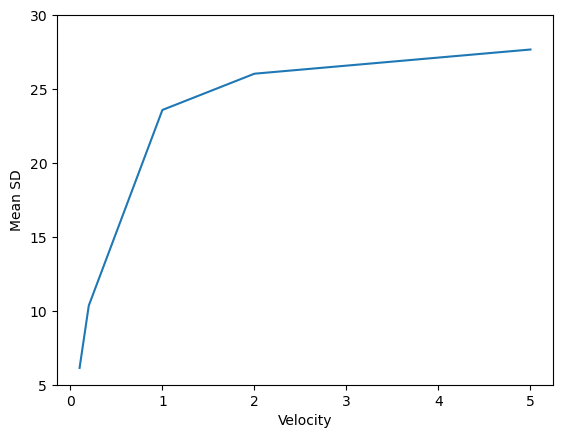

In [28]:
plt.plot([0.1, 0.2, 1, 2, 5], np.mean(mean_all_SD[-2, :, :],axis=-1))
plt.xlabel('Velocity')
plt.ylabel('Mean SD')
plt.ylim(5, 30)
plt.savefig('manuscript_figures/fig2_sim_SD_mean_vs_velocity.pdf', bbox_inches='tight', format='pdf')

In [79]:
print(mean_ratio_SD[2, 2, 1])
print(std_ratio_SD[2, 2, 1])

high_spat_freq_mean = mean_ratio_SD[2, 2, 1]
high_spat_freq_std = std_ratio_SD[2, 2, 1]

1.2122985759624385
0.017408033647423334


In [80]:
print(mean_ratio_SD[4, 2, 1])
print(std_ratio_SD[4, 2, 1])

low_spat_freq_mean = mean_ratio_SD[4, 2, 1]
low_spat_freq_std = std_ratio_SD[4, 2, 1]

2.2817230659505845
0.08826077517653201


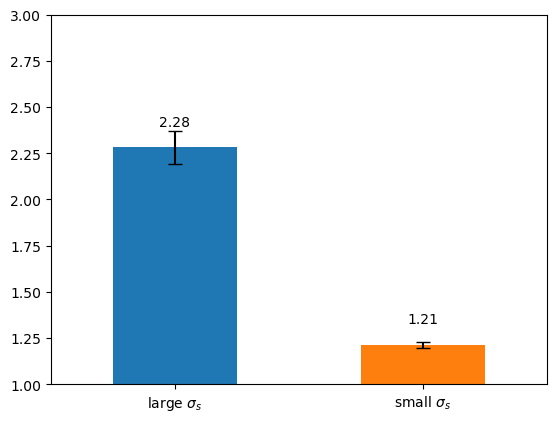

In [84]:
avg_ratio_SD = [low_spat_freq_mean, high_spat_freq_mean]

p = plt.bar([1, 2], avg_ratio_SD, color=['tab:blue', 'tab:orange'], width=0.5, yerr=[low_spat_freq_std, high_spat_freq_std], capsize=5)
plt.xticks([1, 2], ['large $\\sigma_s$', 'small $\\sigma_s$'])
plt.ylim(1, 3)
plt.xlim(0.5, 2.5)
# add label above each bar with the ratio value
for i, bar in enumerate(p):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{avg_ratio_SD[i]:.2f}', ha='center', va='bottom')
plt.savefig('manuscript_figures/fig5_sim_SD_ratio_redone.pdf', bbox_inches='tight', format='pdf')

In [ ]:
# plot the environments corresponding to these
for i, sigma_val in enumerate(sigma_arr):
    for j, environment_num in enumerate(f[sigma_val].keys()):
        mask = f[sigma_val][environment_num]['mask'][()].T
        plt.imshow(mask, norm=norm, cmap='gray', extent=[x_min, x_max, x_min, x_max], origin='lower', interpolation='none')
        plt.xlim(0, 50)
        plt.ylim(0, 50)
        # plt.plot(f[sigma_val][environment_num][vel_arr[1]][radius_num]['simulation_0']['trajectory'][()][:, 0],
        #          f[sigma_val][environment_num][vel_arr[1]][radius_num]['simulation_0']['trajectory'][()][:, 1], color='tab:red')
        # plt.plot(f[sigma_val][environment_num][vel_arr[2]][radius_num]['simulation_0']['trajectory'][()][:, 0],
        #          f[sigma_val][environment_num][vel_arr[2]][radius_num]['simulation_0']['trajectory'][()][:, 1], color='tab:blue')
        # plt.xlabel('X Position')
        # plt.ylabel('Y Position')
        # plt.title(f"Environment: {environment_num}, Sigma: {sigma_val}")
        # remove axes
        plt.axis('off')
        plt.savefig(f"manuscript_figures/fig5_environment_{environment_num}_sigma_{sigma_val}.pdf", bbox_inches='tight', format='pdf')
        plt.show()
        plt.close()